# Linear Regression

In [20]:
#Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading files
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df.shape
#removing outliers
df=df[df["trip_duration"]<6000]
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df.drop(["id","pickup_datetime","dropoff_datetime", "store_and_fwd_flag"],axis=1,inplace=True)

In [5]:
df.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
dtype: object

In [190]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-74,41,-74,41,400
1,1,2,-74,41,-74,41,1100
2,2,2,-74,41,-74,41,1635
3,2,6,-74,41,-74,41,1141
4,1,1,-74,41,-74,41,848


In [12]:
#seperating independent and dependent variables
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((724984, 6), (724984,))

In [15]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 52)

In [10]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [16]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [17]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 411.2606036142575


In [18]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     412.3746827539336


In [238]:
lr.coef_

array([-1.67695182e-01,  6.53589860e+00,  4.93890845e+03, -3.16066179e+03,
        3.88314099e+03, -3.10767702e+03])

Text(0.5, 1.0, 'Coefficient plot')

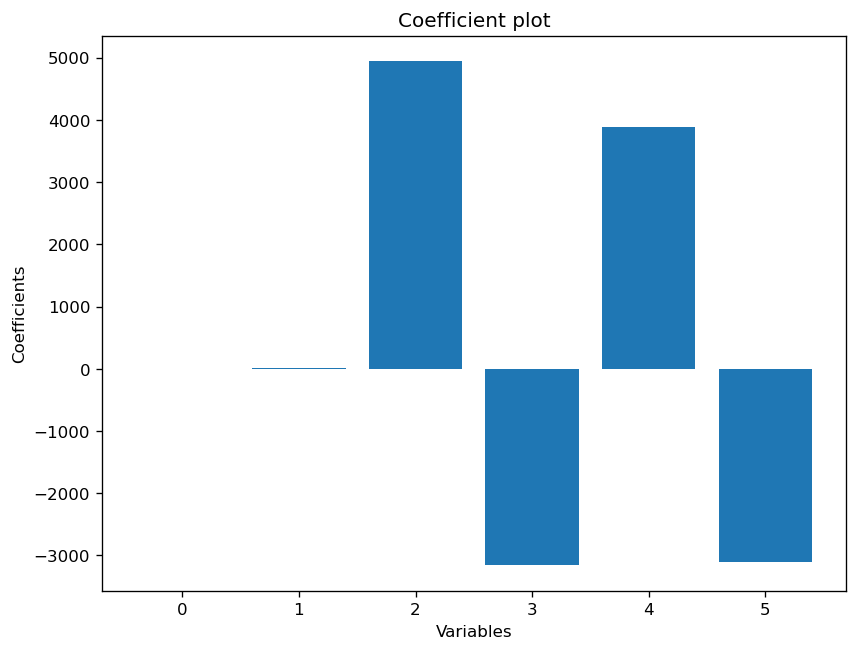

In [239]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

The coefficients have been scaled. Some of the coefficient are insignificant so we can remove them.

In [224]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
126475,380,7e+02,-3.2e+02
534206,523,7.2e+02,-1.9e+02
337897,671,6.6e+02,10
550805,3317,1.3e+03,2e+03
515205,1499,6.3e+02,8.7e+02


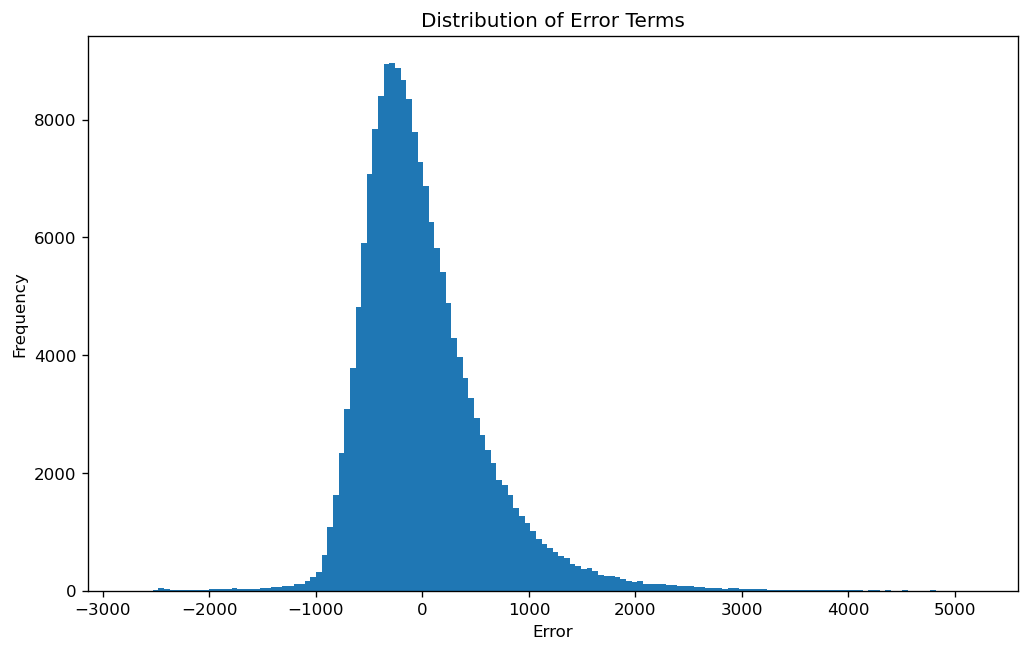

In [225]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

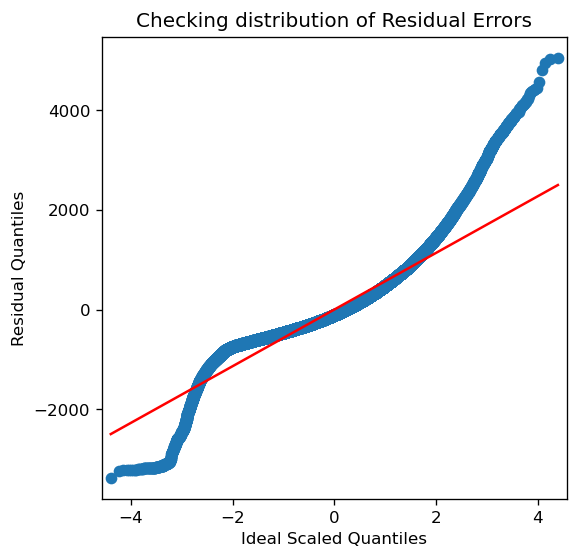

In [210]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

# Ridge regression model

In [240]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 5)
ridgeR.fit(train_x,train_y)
y_pred = ridgeR.predict(test_x)

mean_squared_error_ridge = np.mean((y_pred-test_y)**2)
print("Mean squared error on test :", mean_squared_error_ridge)

ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = train_x.columns
ridge_coefficient["Coefficient_Estimate"]= pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared error on test : 322937.74847921863
             Columns  Coefficient_Estimate
0          vendor_id                 -0.14
1    passenger_count                   6.5
2   pickup_longitude               4.9e+03
3    pickup_latitude              -3.1e+03
4  dropoff_longitude               3.9e+03
5   dropoff_latitude              -3.1e+03


Text(0.5, 1.0, 'Coefficient plot')

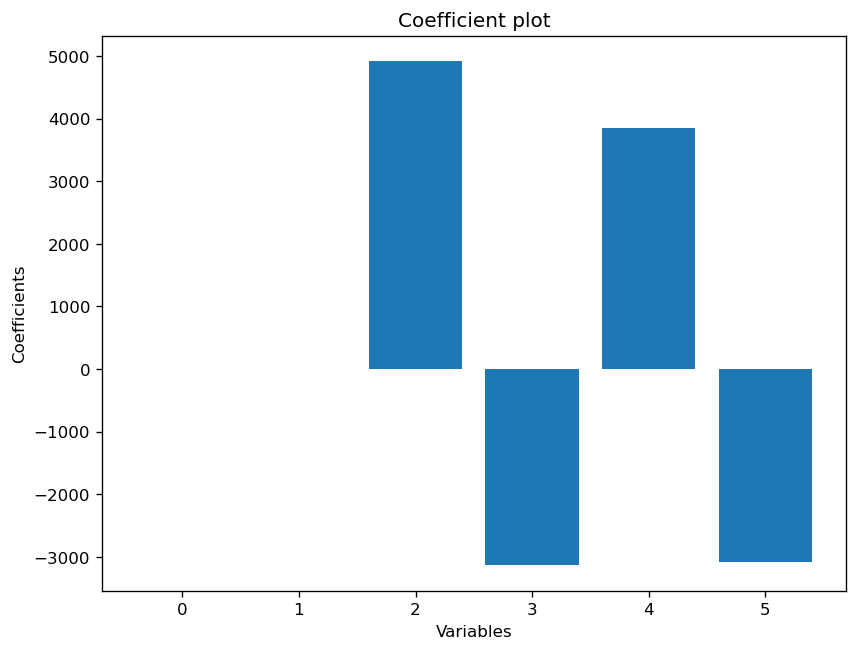

In [241]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = ridgeR.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

This is bar plot after Ridge regression model.

# Lasso Regression model

In [242]:
# Importing lasso from sklearn's linear_model module
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(train_x,train_y)
y_pred1 = lasso.predict(test_x)

mean_squared_error = np.mean((y_pred1-test_y)**2)
print("Mean squared error on test :", mean_squared_error)

lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = train_x.columns
lasso_coefficient["Coefficient_Estimate"]= pd.Series(lasso.coef_)
print(lasso_coefficient)

Mean squared error on test : 326003.64275173476
             Columns  Coefficient_Estimate
0          vendor_id                     0
1    passenger_count                   6.1
2   pickup_longitude               4.5e+03
3    pickup_latitude              -2.3e+03
4  dropoff_longitude                 3e+03
5   dropoff_latitude              -2.3e+03


Text(0.5, 1.0, 'Coefficient plot')

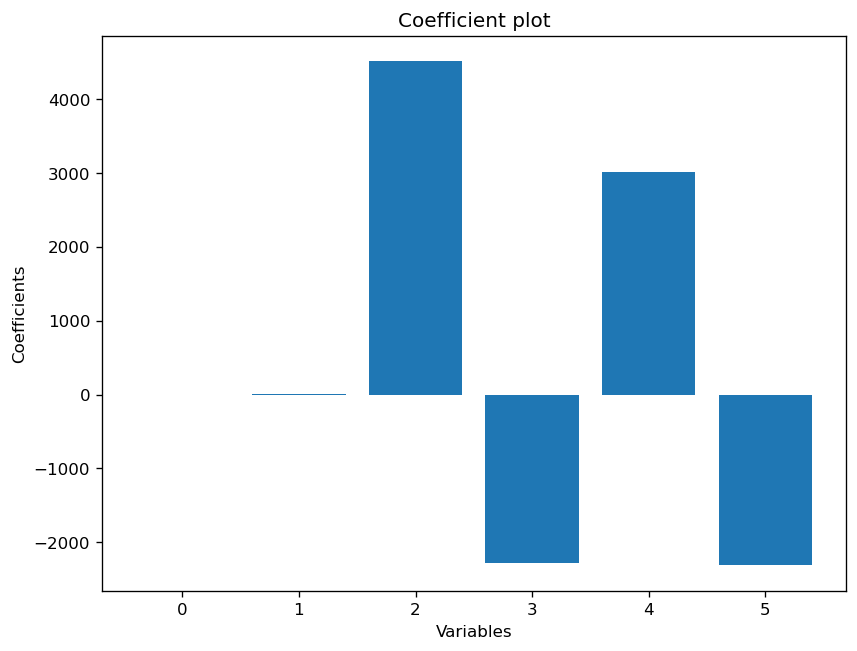

In [243]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lasso.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

This is bar plot after Lasso regression model.

# linear regression after removing insignificant Coefficents

In [244]:
#seperating independent and dependent variables
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((724984, 6), (724984,))

In [212]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,vendor_id,-0.17
1,passenger_count,6.5
2,pickup_longitude,4.9e+03
3,pickup_latitude,-3.2e+03
4,dropoff_longitude,3.9e+03


In [213]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [214]:
subset = df[sig_var['Variable'].values]
subset.head()

,passenger_count,pickup_longitude,dropoff_longitude
0,1,-74,-74
1,2,-74,-74
2,2,-74,-74
3,6,-74,-74
4,1,-74,-74


In [215]:
lr_coefficient = pd.DataFrame()
lr_coefficient["Columns"] = train_x.columns
lr_coefficient["Coefficient_Estimate"]= pd.Series(lr.coef_)
print(lr_coefficient)

             Columns  Coefficient_Estimate
0          vendor_id                 -0.17
1    passenger_count                   6.5
2   pickup_longitude               4.9e+03
3    pickup_latitude              -3.2e+03
4  dropoff_longitude               3.9e+03
5   dropoff_latitude              -3.1e+03


In [216]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 52)

In [217]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [218]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Training Mean Absolute Error 430.5039621614265
Test Mean Absolute Error     431.52785110658874


Text(0.5, 1.0, 'Normalized Coefficient plot')

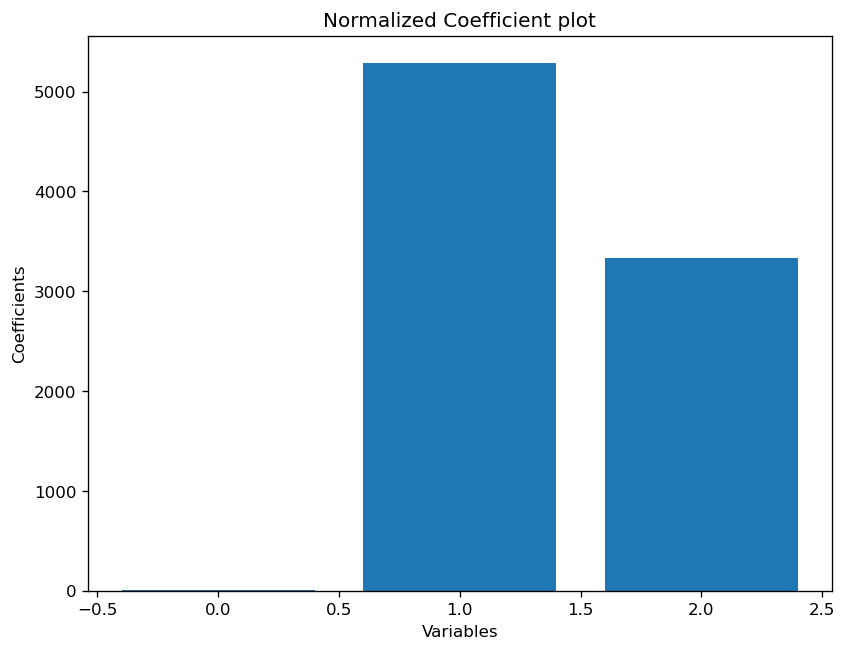

In [219]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

This is the plot after removing insignificant coefficients and scaling the coefficients.